# 第6章: Regression Models with Multiple Regressors（重回帰モデル）練習問題

この章では重回帰モデル、省略変数バイアス、多重共線性について学びます。

In [1]:
# 必要なパッケージの読み込み
library(AER)
data("CASchools")
CASchools$STR <- CASchools$students / CASchools$teachers
CASchools$score <- (CASchools$read + CASchools$math) / 2

Loading required package: car



Loading required package: carData



Loading required package: lmtest



Loading required package: zoo




Attaching package: ‘zoo’




The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




Loading required package: sandwich



Loading required package: survival



---
## 問題1: 重回帰モデルの推定

テストスコア(score)を被説明変数、学生教師比率(STR)と英語学習者の割合(english)を説明変数とする重回帰モデルを推定してください。

1. モデルを推定
2. 結果を表示し、各係数を解釈
3. 単回帰(score ~ STR)との係数の違いを確認

In [2]:
# 問題1の解答欄



### 模範解答

In [3]:
# 模範解答
# 単回帰モデル
model_simple <- lm(score ~ STR, data = CASchools)

# 1. 重回帰モデル
model_multi <- lm(score ~ STR + english, data = CASchools)

# 2. 結果の表示
cat("=== 重回帰モデルの結果 ===", "\n")
summary(model_multi)

# 3. 係数の比較
cat("\n=== 係数の比較 ===", "\n")
cat("単回帰モデルの STR 係数:", coef(model_simple)[2], "\n")
cat("重回帰モデルの STR 係数:", coef(model_multi)[2], "\n\n")

# 解釈
cat("=== 解釈 ===", "\n")
cat("STR の係数: 英語学習者の割合を一定として、\n")
cat("STRが1増加するとスコアは約", round(coef(model_multi)[2], 2), "点変化\n\n")
cat("english の係数: STRを一定として、\n")
cat("英語学習者の割合が1%増加するとスコアは約", round(coef(model_multi)[3], 2), "点変化\n")

=== 重回帰モデルの結果 === 



Call:
lm(formula = score ~ STR + english, data = CASchools)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.845 -10.240  -0.308   9.815  43.461 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 686.03224    7.41131  92.566  < 2e-16 ***
STR          -1.10130    0.38028  -2.896  0.00398 ** 
english      -0.64978    0.03934 -16.516  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.46 on 417 degrees of freedom
Multiple R-squared:  0.4264,	Adjusted R-squared:  0.4237 
F-statistic:   155 on 2 and 417 DF,  p-value: < 2.2e-16



=== 係数の比較 === 


単回帰モデルの STR 係数: -2.279808 


重回帰モデルの STR 係数: -1.101296 



=== 解釈 === 


STR の係数: 英語学習者の割合を一定として、


STRが1増加するとスコアは約 -1.1 点変化



english の係数: STRを一定として、


英語学習者の割合が1%増加するとスコアは約 -0.65 点変化


---
## 問題2: 省略変数バイアス（OVB）

省略変数バイアスの方向を理論的に予測し、実際のデータで確認します。

1. STRとenglishの相関を計算
2. englishとscoreの相関（STRを制御しない場合）を計算
3. OVBの公式を使って、englishを省略した場合のバイアスの方向を予測
4. 実際の係数の差と比較

In [4]:
# 問題2の解答欄



### 模範解答

In [5]:
# 模範解答
# 1. STRとenglishの相関
cor_STR_english <- cor(CASchools$STR, CASchools$english)
cat("STRとenglishの相関:", cor_STR_english, "\n")

# 2. englishとscoreの相関
cor_english_score <- cor(CASchools$english, CASchools$score)
cat("englishとscoreの相関:", cor_english_score, "\n\n")

# 補助回帰: english ~ STR
aux_reg <- lm(english ~ STR, data = CASchools)
delta <- coef(aux_reg)[2]  # englishに対するSTRの効果

# 3. OVBの計算
# OVB = δ × β_english
# δ: englishに対するSTRの回帰係数
# β_english: 真のモデルでのenglishの係数

beta_english <- coef(model_multi)[3]  # 重回帰からのenglishの係数

OVB <- delta * beta_english
cat("=== OVBの計算 ===", "\n")
cat("補助回帰の係数 δ =", delta, "\n")
cat("englishの真の係数 β_english =", beta_english, "\n")
cat("推定されるOVB = δ × β_english =", OVB, "\n\n")

# 4. 実際の係数差との比較
actual_diff <- coef(model_simple)[2] - coef(model_multi)[2]
cat("実際の係数差（単回帰 - 重回帰）:", actual_diff, "\n\n")

cat("=== 解釈 ===", "\n")
cat("STRとenglishは正の相関（", round(cor_STR_english, 3), "）\n")
cat("englishはscoreに負の影響（", round(beta_english, 3), "）\n")
cat("→ englishを省略するとSTRの係数は負の方向にバイアス\n")

STRとenglishの相関: 0.1876424 


englishとscoreの相関: -0.6441238 



=== OVBの計算 === 


補助回帰の係数 δ = 1.813719 


englishの真の係数 β_english = -0.6497768 


推定されるOVB = δ × β_english = -1.178512 



実際の係数差（単回帰 - 重回帰）: -1.178512 



=== 解釈 === 


STRとenglishは正の相関（ 0.188 ）


englishはscoreに負の影響（ -0.65 ）


→ englishを省略するとSTRの係数は負の方向にバイアス


---
## 問題3: 自由度調整済み決定係数

単回帰モデルと重回帰モデルの決定係数を比較します。

1. 各モデルのR²を計算
2. 各モデルの自由度調整済みR²を計算
3. なぜ自由度調整済みR²を使うべきかを説明

In [6]:
# 問題3の解答欄



### 模範解答

In [7]:
# 模範解答
model_simple <- lm(score ~ STR, data = CASchools)
model_multi <- lm(score ~ STR + english, data = CASchools)

# 1-2. R²と調整済みR²
cat("=== 単回帰モデル ===", "\n")
cat("R² =", summary(model_simple)$r.squared, "\n")
cat("調整済みR² =", summary(model_simple)$adj.r.squared, "\n\n")

cat("=== 重回帰モデル ===", "\n")
cat("R² =", summary(model_multi)$r.squared, "\n")
cat("調整済みR² =", summary(model_multi)$adj.r.squared, "\n\n")

# 手計算での確認
n <- nrow(CASchools)
k_simple <- 1  # 説明変数の数
k_multi <- 2

R2_simple <- summary(model_simple)$r.squared
R2_multi <- summary(model_multi)$r.squared

adj_R2_simple <- 1 - (1 - R2_simple) * (n - 1) / (n - k_simple - 1)
adj_R2_multi <- 1 - (1 - R2_multi) * (n - 1) / (n - k_multi - 1)

cat("=== 手計算での確認 ===", "\n")
cat("単回帰の調整済みR²:", adj_R2_simple, "\n")
cat("重回帰の調整済みR²:", adj_R2_multi, "\n\n")

# 3. 説明
cat("=== なぜ調整済みR²を使うか ===", "\n")
cat("R²は説明変数を追加すると必ず増加する。\n")
cat("調整済みR²は、説明変数の追加による自由度の減少を考慮。\n")
cat("無関係な変数を追加した場合、調整済みR²は減少する。\n")
cat("→ モデル選択において、より適切な指標となる。\n")

=== 単回帰モデル === 


R² = 0.05124009 


調整済みR² = 0.04897033 



=== 重回帰モデル === 


R² = 0.4264315 


調整済みR² = 0.4236805 



=== 手計算での確認 === 


単回帰の調整済みR²: 0.04897033 


重回帰の調整済みR²: 0.4236805 



=== なぜ調整済みR²を使うか === 


R²は説明変数を追加すると必ず増加する。


調整済みR²は、説明変数の追加による自由度の減少を考慮。


無関係な変数を追加した場合、調整済みR²は減少する。


→ モデル選択において、より適切な指標となる。


---
## 問題4: 多重共線性の検出

説明変数間の相関が高い場合の問題を確認します。

1. STR, english, lunch（無料昼食を受ける生徒の割合）の相関行列を計算
2. VIF（分散拡大係数）を計算
3. 多重共線性が推定に与える影響を確認

In [8]:
# 問題4の解答欄



### 模範解答

In [9]:
# 模範解答
# install.packages("car")  # VIF計算用
library(car)

# 1. 相関行列
vars <- c("STR", "english", "lunch")
cor_matrix <- cor(CASchools[, vars])
cat("=== 相関行列 ===", "\n")
print(round(cor_matrix, 3))

# 重回帰モデル
model_full <- lm(score ~ STR + english + lunch, data = CASchools)

# 2. VIFの計算
cat("\n=== VIF（分散拡大係数）===", "\n")
print(vif(model_full))

# 3. 係数の比較
cat("\n=== 多重共線性の影響 ===", "\n")

# englishのみを含むモデル
model_eng <- lm(score ~ STR + english, data = CASchools)
# lunchのみを含むモデル
model_lunch <- lm(score ~ STR + lunch, data = CASchools)

cat("STRの係数の比較:\n")
cat("score ~ STR + english:", coef(model_eng)[2], "\n")
cat("score ~ STR + lunch:", coef(model_lunch)[2], "\n")
cat("score ~ STR + english + lunch:", coef(model_full)[2], "\n\n")

cat("englishとlunchの相関が高い（", round(cor_matrix[2,3], 3), "）\n")
cat("→ 両方を含めると係数の標準誤差が大きくなる\n")

=== 相関行列 === 


          STR english lunch
STR     1.000   0.188 0.135
english 0.188   1.000 0.653
lunch   0.135   0.653 1.000



=== VIF（分散拡大係数）=== 


     STR  english    lunch 
1.036795 1.774754 1.744149 



=== 多重共線性の影響 === 


STRの係数の比較:


score ~ STR + english: -1.101296 


score ~ STR + lunch: -1.117225 


score ~ STR + english + lunch: -0.998309 



englishとlunchの相関が高い（ 0.653 ）


→ 両方を含めると係数の標準誤差が大きくなる


---
## 問題5: 完全多重共線性

完全多重共線性が発生するケースを確認します。

1. 完全多重共線性を持つ変数を作成（例: STR_double = 2 * STR）
2. この変数を含めて回帰分析を試み、何が起こるか確認
3. ダミー変数トラップの例を確認

In [10]:
# 問題5の解答欄



### 模範解答

In [11]:
# 模範解答
# 1-2. 完全多重共線性
CASchools$STR_double <- 2 * CASchools$STR

cat("=== 完全多重共線性の例 ===", "\n")
model_collinear <- lm(score ~ STR + STR_double, data = CASchools)
cat("係数:\n")
print(coef(model_collinear))
cat("\n→ Rは自動的に片方の変数をNAとして除外する\n\n")

# 3. ダミー変数トラップ
# カテゴリカル変数を作成
CASchools$size_small <- ifelse(CASchools$STR <= 18, 1, 0)
CASchools$size_medium <- ifelse(CASchools$STR > 18 & CASchools$STR <= 22, 1, 0)
CASchools$size_large <- ifelse(CASchools$STR > 22, 1, 0)

# 全てのダミー変数を含める（ダミー変数トラップ）
cat("=== ダミー変数トラップ ===", "\n")
model_dummy_trap <- lm(score ~ size_small + size_medium + size_large, data = CASchools)
cat("全ダミー変数を含めた場合:\n")
print(coef(model_dummy_trap))

# 正しい方法（1つを参照カテゴリとして除外）
cat("\n正しい方法（largeを参照カテゴリとして除外）:\n")
model_dummy_correct <- lm(score ~ size_small + size_medium, data = CASchools)
print(coef(model_dummy_correct))

cat("\n=== 解釈 ===", "\n")
cat("切片: 大規模クラス（参照カテゴリ）の平均スコア\n")
cat("size_small: 小規模クラスと大規模クラスのスコア差\n")
cat("size_medium: 中規模クラスと大規模クラスのスコア差\n")

=== 完全多重共線性の例 === 


係数:


(Intercept)         STR  STR_double 
 698.932949   -2.279808          NA 



→ Rは自動的に片方の変数をNAとして除外する



=== ダミー変数トラップ === 


全ダミー変数を含めた場合:


(Intercept)  size_small size_medium  size_large 
 647.497296   14.602701    5.495376          NA 



正しい方法（largeを参照カテゴリとして除外）:


(Intercept)  size_small size_medium 
 647.497296   14.602701    5.495376 



=== 解釈 === 


切片: 大規模クラス（参照カテゴリ）の平均スコア


size_small: 小規模クラスと大規模クラスのスコア差


size_medium: 中規模クラスと大規模クラスのスコア差


---
## 問題6: OLS仮定の確認

重回帰モデル score ~ STR + english について、OLS仮定を確認します。

1. 残差の正規性を確認（Q-Qプロット）
2. 残差の均一分散性を確認
3. 残差と説明変数の関係を確認

In [12]:
# 問題6の解答欄



### 模範解答

Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <ad>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <a3>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <e8>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <a6>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <8f>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <97>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <ad>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on '正規Q-Qプロット' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(...):
“conversion failure on '残差 vs. 予測値' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '残差 vs. 予測値' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '残差 vs. 予測値' in 'mbcsToSbcs': dot substituted for <8b>”


Warning message in title(...):
“conversion failure on '残差 vs. 予測値' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '残差 vs. 予測値' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in title(...):
“conversion failure on '残差 vs. 予測値' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '残差 vs. 予測値' in 'mbcsToSbcs': dot substituted for <e4>”


Warning message in title(...):
“conversion failure on '残差 vs. 予測値' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in title(...):
“conversion failure on '残差 vs. 予測値' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(...):
“conversion failure on '残差 vs. 予測値' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '残差 vs. 予測値' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(...):
“conversion failure on '残差 vs. 予測値' in 'mbcsToSbcs': dot substituted for <ac>”


Warning message in title(...):
“conversion failure on '残差 vs. 予測値' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '残差 vs. 予測値' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in title(...):
“conversion failure on '残差 vs. 予測値' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in title(...):
“conversion failure on '予測値' in 'mbcsToSbcs': dot substituted for <e4>”


Warning message in title(...):
“conversion failure on '予測値' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in title(...):
“conversion failure on '予測値' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(...):
“conversion failure on '予測値' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '予測値' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(...):
“conversion failure on '予測値' in 'mbcsToSbcs': dot substituted for <ac>”


Warning message in title(...):
“conversion failure on '予測値' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '予測値' in 'mbcsToSbcs': dot substituted for <80>”


Warning message in title(...):
“conversion failure on '予測値' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in title(...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <8b>”


Warning message in title(...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in title(...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '残差 vs. STR' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '残差 vs. STR' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '残差 vs. STR' in 'mbcsToSbcs': dot substituted for <8b>”


Warning message in title(...):
“conversion failure on '残差 vs. STR' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '残差 vs. STR' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in title(...):
“conversion failure on '残差 vs. STR' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <8b>”


Warning message in title(...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in title(...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '残差 vs. english' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '残差 vs. english' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '残差 vs. english' in 'mbcsToSbcs': dot substituted for <8b>”


Warning message in title(...):
“conversion failure on '残差 vs. english' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '残差 vs. english' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in title(...):
“conversion failure on '残差 vs. english' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <8b>”


Warning message in title(...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in title(...):
“conversion failure on '残差' in 'mbcsToSbcs': dot substituted for <ae>”



=== Breusch-Pagan検定（均一分散）=== 



	studentized Breusch-Pagan test

data:  model
BP = 29.501, df = 2, p-value = 3.926e-07



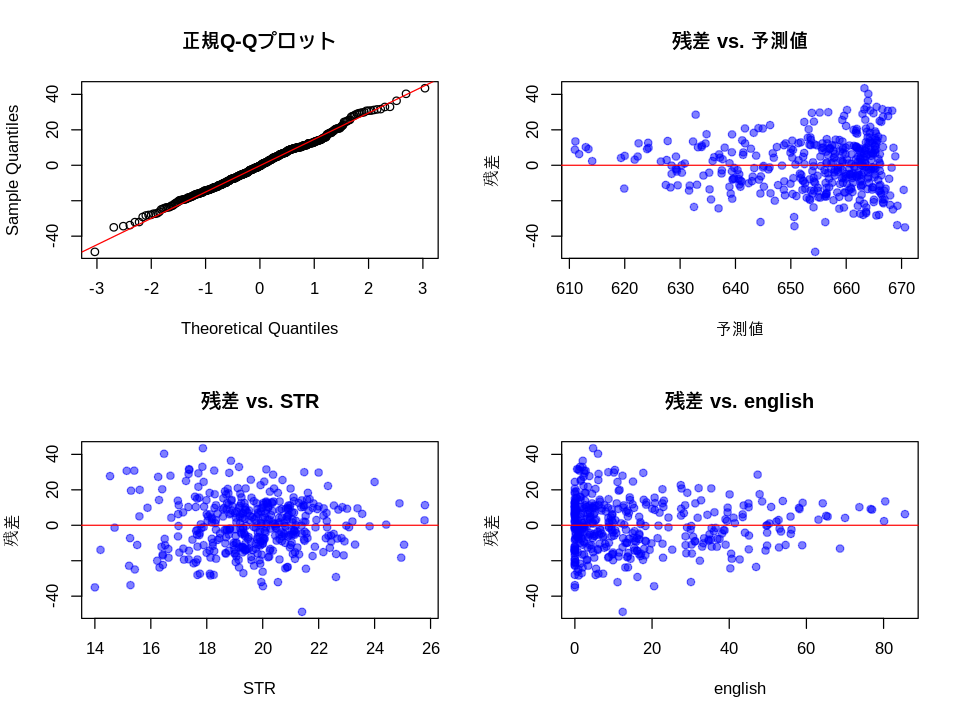

In [13]:
# 模範解答
model <- lm(score ~ STR + english, data = CASchools)

par(mfrow = c(2, 2))

# 1. 正規性の確認
qqnorm(resid(model), main = "正規Q-Qプロット")
qqline(resid(model), col = "red")

# 2. 均一分散性の確認
plot(fitted(model), resid(model),
     main = "残差 vs. 予測値",
     xlab = "予測値", ylab = "残差",
     pch = 19, col = rgb(0, 0, 1, 0.5))
abline(h = 0, col = "red")

# 3. 残差と説明変数の関係
plot(CASchools$STR, resid(model),
     main = "残差 vs. STR",
     xlab = "STR", ylab = "残差",
     pch = 19, col = rgb(0, 0, 1, 0.5))
abline(h = 0, col = "red")

plot(CASchools$english, resid(model),
     main = "残差 vs. english",
     xlab = "english", ylab = "残差",
     pch = 19, col = rgb(0, 0, 1, 0.5))
abline(h = 0, col = "red")

par(mfrow = c(1, 1))

# 統計的検定
library(lmtest)
cat("\n=== Breusch-Pagan検定（均一分散）===", "\n")
print(bptest(model))

---
## 問題7: 標準化回帰係数

変数のスケールが異なる場合の係数の比較のために、標準化回帰係数を計算します。

1. 各変数を標準化（平均0、標準偏差1）してから回帰分析を実行
2. 標準化係数を解釈
3. どの変数の影響が最も大きいか判断

In [14]:
# 問題7の解答欄



### 模範解答

In [15]:
# 模範解答
# 変数の標準化
CASchools$score_std <- scale(CASchools$score)
CASchools$STR_std <- scale(CASchools$STR)
CASchools$english_std <- scale(CASchools$english)
CASchools$lunch_std <- scale(CASchools$lunch)

# 1. 標準化変数での回帰
model_std <- lm(score_std ~ STR_std + english_std + lunch_std, data = CASchools)

cat("=== 標準化回帰係数 ===", "\n")
print(summary(model_std)$coefficients)

# 元の係数との比較
model_orig <- lm(score ~ STR + english + lunch, data = CASchools)

cat("\n=== 元の回帰係数 ===", "\n")
print(summary(model_orig)$coefficients[, 1:2])

# 2-3. 解釈
cat("\n=== 解釈 ===", "\n")
std_coefs <- coef(model_std)[-1]  # 切片を除く
cat("標準化係数の絶対値:\n")
print(sort(abs(std_coefs), decreasing = TRUE))

cat("\n最も影響が大きい変数: lunch（無料昼食を受ける生徒の割合）\n")
cat("lunchが1標準偏差増加すると、scoreは約", 
    round(abs(std_coefs[3]), 3), "標準偏差変化\n")

=== 標準化回帰係数 === 


                 Estimate Std. Error       t value     Pr(>|t|)
(Intercept)  7.756787e-16 0.02325379  3.335709e-14 1.000000e+00
STR_std     -9.912236e-02 0.02370597 -4.181324e+00 3.535873e-05
english_std -1.166768e-01 0.03101562 -3.761872e+00 1.928369e-04
lunch_std   -7.791733e-01 0.03074703 -2.534142e+01 2.303048e-86



=== 元の回帰係数 === 


               Estimate Std. Error
(Intercept) 700.1499572 4.68568672
STR          -0.9983090 0.23875428
english      -0.1215735 0.03231728
lunch        -0.5473454 0.02159885



=== 解釈 === 


標準化係数の絶対値:


  lunch_std english_std     STR_std 
 0.77917328  0.11667680  0.09912236 



最も影響が大きい変数: lunch（無料昼食を受ける生徒の割合）


lunchが1標準偏差増加すると、scoreは約 0.779 標準偏差変化


---
## 問題8: 偏回帰プロット

各説明変数の部分的な効果を視覚化する偏回帰プロット（added-variable plot）を作成します。

1. score ~ STR + english モデルについて、STRの偏回帰プロットを作成
2. car パッケージの avPlots() 関数を使用して全ての偏回帰プロットを作成

In [16]:
# 問題8の解答欄



### 模範解答

Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <8f>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <9b>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <9e>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <b8>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <b0>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <97>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <ad>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <ef>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <88>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <89>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <8b>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <8b>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <95>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <ef>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <bc>”


Warning message in title(...):
“conversion failure on 'STRの偏回帰プロット（手動）' in 'mbcsToSbcs': dot substituted for <89>”


偏回帰の傾き: -1.101296 


重回帰のSTR係数: -1.101296 



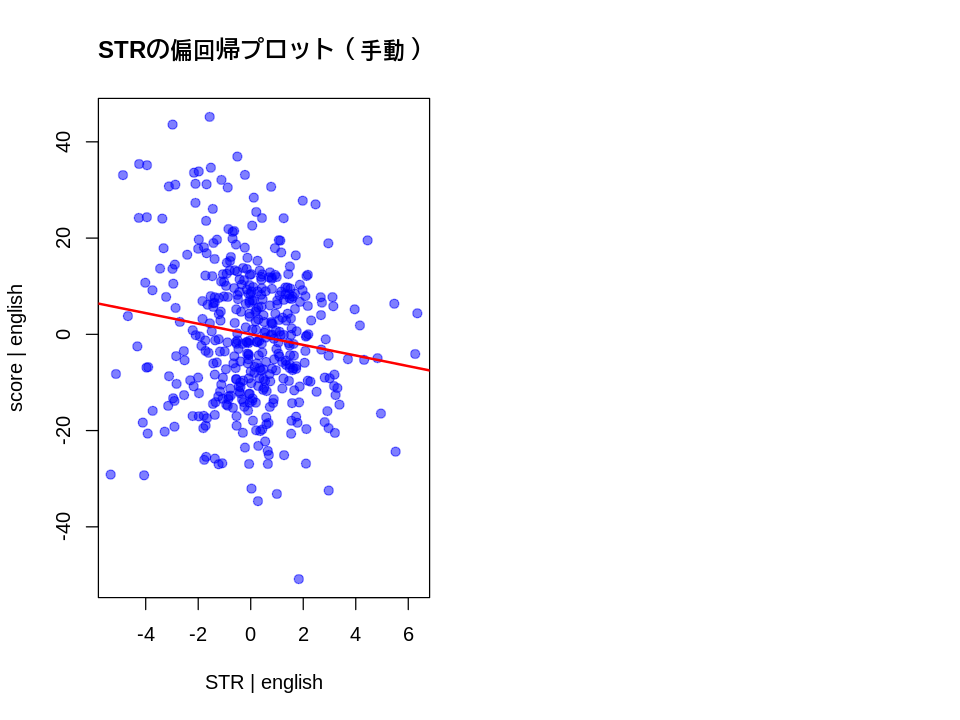

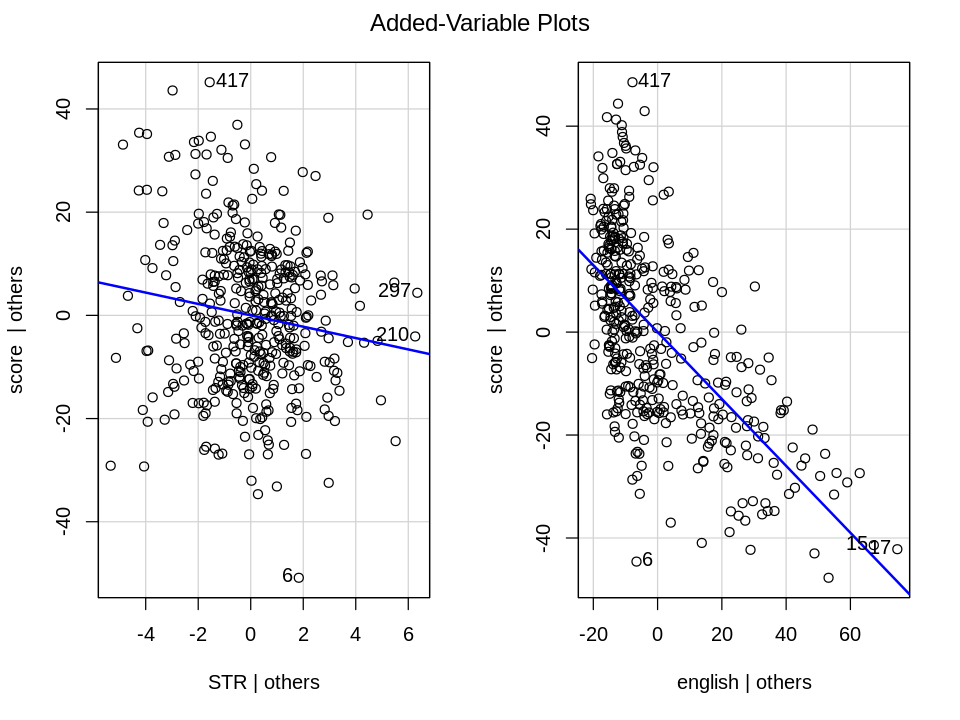

In [17]:
# 模範解答
library(car)

model <- lm(score ~ STR + english, data = CASchools)

# 1. 手動でSTRの偏回帰プロット
# Step 1: scoreをenglishで回帰し、残差を取得
resid_score <- resid(lm(score ~ english, data = CASchools))

# Step 2: STRをenglishで回帰し、残差を取得
resid_STR <- resid(lm(STR ~ english, data = CASchools))

# Step 3: 残差同士の散布図
par(mfrow = c(1, 2))

plot(resid_STR, resid_score,
     main = "STRの偏回帰プロット（手動）",
     xlab = "STR | english",
     ylab = "score | english",
     pch = 19, col = rgb(0, 0, 1, 0.5))
abline(lm(resid_score ~ resid_STR), col = "red", lwd = 2)

# 傾きの確認
cat("偏回帰の傾き:", coef(lm(resid_score ~ resid_STR))[2], "\n")
cat("重回帰のSTR係数:", coef(model)[2], "\n\n")

# 2. avPlots()を使用
avPlots(model, main = "Added-Variable Plots")

par(mfrow = c(1, 1))

---
## 問題9: モデル比較

異なる説明変数の組み合わせでモデルを比較します。

1. 以下の5つのモデルを推定
   - Model 1: score ~ STR
   - Model 2: score ~ STR + english
   - Model 3: score ~ STR + lunch
   - Model 4: score ~ STR + english + lunch
   - Model 5: score ~ STR + english + lunch + calworks + income

2. 各モデルの調整済みR²を比較
3. AIC/BICを使ったモデル選択

In [18]:
# 問題9の解答欄



### 模範解答

In [19]:
# 模範解答
# 1. モデルの推定
model1 <- lm(score ~ STR, data = CASchools)
model2 <- lm(score ~ STR + english, data = CASchools)
model3 <- lm(score ~ STR + lunch, data = CASchools)
model4 <- lm(score ~ STR + english + lunch, data = CASchools)
model5 <- lm(score ~ STR + english + lunch + calworks + income, data = CASchools)

# 2. 調整済みR²の比較
models <- list(model1, model2, model3, model4, model5)
model_names <- c("Model 1", "Model 2", "Model 3", "Model 4", "Model 5")

comparison <- data.frame(
  Model = model_names,
  R2 = sapply(models, function(m) summary(m)$r.squared),
  Adj_R2 = sapply(models, function(m) summary(m)$adj.r.squared),
  AIC = sapply(models, AIC),
  BIC = sapply(models, BIC),
  Vars = c(1, 2, 2, 3, 5)
)

cat("=== モデル比較 ===", "\n")
comparison[, 2:6] <- round(comparison[, 2:6], 3)
print(comparison)

# 3. 最良モデルの選択
cat("\n=== モデル選択 ===", "\n")
cat("調整済みR²が最大: Model", which.max(comparison$Adj_R2), "\n")
cat("AICが最小: Model", which.min(comparison$AIC), "\n")
cat("BICが最小: Model", which.min(comparison$BIC), "\n")

=== モデル比較 === 


    Model    R2 Adj_R2      AIC      BIC Vars
1 Model 1 0.051  0.049 3650.499 3662.620    1
2 Model 2 0.426  0.424 3441.122 3457.283    2
3 Model 3 0.767  0.766 3063.049 3079.210    2
4 Model 4 0.775  0.773 3050.999 3071.200    3
5 Model 5 0.806  0.804 2991.653 3019.935    5



=== モデル選択 === 


調整済みR²が最大: Model 5 


AICが最小: Model 5 


BICが最小: Model 5 


---
## 問題10: シミュレーション - OLSの一致性

サンプルサイズを増やすとOLS推定量が真の値に収束することを確認します。

真のモデル: Y = 5 + 2X₁ + 3X₂ + u

1. サンプルサイズ n = 50, 100, 500, 1000, 5000 でシミュレーション
2. 各サンプルサイズで1000回推定を繰り返し
3. 推定量の分布がサンプルサイズとともに真の値に収束することを確認

In [20]:
# 問題10の解答欄



### 模範解答

=== シミュレーション結果 === 


真の値: β₁ = 2, β₂ = 3



     n beta1_mean beta1_sd beta2_mean beta2_sd
1   50     1.9968   0.2993     2.9962   0.2913
2  100     2.0039   0.2093     2.9989   0.2020
3  500     1.9990   0.0888     2.9982   0.0902
4 1000     1.9989   0.0643     3.0032   0.0645
5 5000     2.0004   0.0274     2.9994   0.0286


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <ce>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <b2>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <cc>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e2>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <a8>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <99>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <8f>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <b5>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <b3>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <97>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <ab>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <b5>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'β̂₁の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <b5>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <b3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <97>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <ab>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <b5>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in title(...):
“conversion failure on '標準偏差' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '標準偏差' in 'mbcsToSbcs': dot substituted for <a8>”


Warning message in title(...):
“conversion failure on '標準偏差' in 'mbcsToSbcs': dot substituted for <99>”


Warning message in title(...):
“conversion failure on '標準偏差' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '標準偏差' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in title(...):
“conversion failure on '標準偏差' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in title(...):
“conversion failure on '標準偏差' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '標準偏差' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on '標準偏差' in 'mbcsToSbcs': dot substituted for <8f>”


Warning message in title(...):
“conversion failure on '標準偏差' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '標準偏差' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in title(...):
“conversion failure on '標準偏差' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <ce>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <b2>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <cc>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e2>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <a8>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <99>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <8f>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <ae>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <b5>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <b3>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <97>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <ab>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <b5>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'β̂₂の標準偏差 vs. サンプルサイズ' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <b5>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <b3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <97>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <83>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <ab>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <b5>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <a4>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <e3>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <82>”


Warning message in title(...):
“conversion failure on 'サンプルサイズ' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in title(...):
“conversion failure on '標準偏差' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '標準偏差' in 'mbcsToSbcs': dot substituted for <a8>”


Warning message in title(...):
“conversion failure on '標準偏差' in 'mbcsToSbcs': dot substituted for <99>”


Warning message in title(...):
“conversion failure on '標準偏差' in 'mbcsToSbcs': dot substituted for <e6>”


Warning message in title(...):
“conversion failure on '標準偏差' in 'mbcsToSbcs': dot substituted for <ba>”


Warning message in title(...):
“conversion failure on '標準偏差' in 'mbcsToSbcs': dot substituted for <96>”


Warning message in title(...):
“conversion failure on '標準偏差' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '標準偏差' in 'mbcsToSbcs': dot substituted for <81>”


Warning message in title(...):
“conversion failure on '標準偏差' in 'mbcsToSbcs': dot substituted for <8f>”


Warning message in title(...):
“conversion failure on '標準偏差' in 'mbcsToSbcs': dot substituted for <e5>”


Warning message in title(...):
“conversion failure on '標準偏差' in 'mbcsToSbcs': dot substituted for <b7>”


Warning message in title(...):
“conversion failure on '標準偏差' in 'mbcsToSbcs': dot substituted for <ae>”



→ サンプルサイズが増加するにつれて、推定量の分散は減少し、


  推定量は真の値に収束する（一致性）


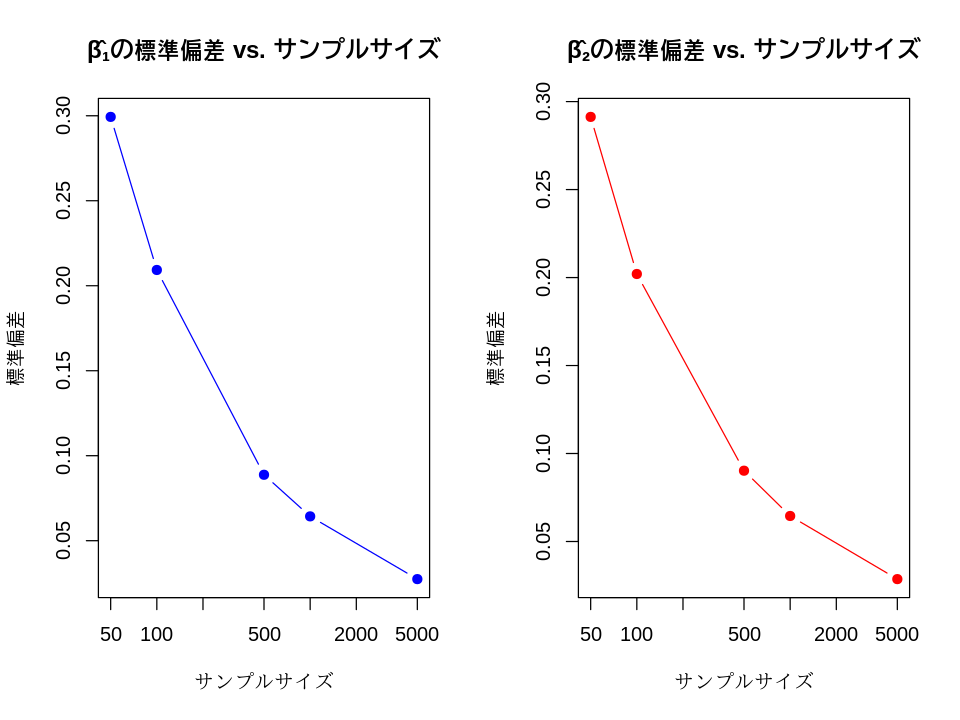

In [21]:
# 模範解答
set.seed(123)

# 真のパラメータ
beta0_true <- 5
beta1_true <- 2
beta2_true <- 3
sigma <- 2

sample_sizes <- c(50, 100, 500, 1000, 5000)
n_sim <- 1000

results <- data.frame()

for (n in sample_sizes) {
  beta1_estimates <- numeric(n_sim)
  beta2_estimates <- numeric(n_sim)
  
  for (i in 1:n_sim) {
    X1 <- rnorm(n, 0, 1)
    X2 <- rnorm(n, 0, 1)
    u <- rnorm(n, 0, sigma)
    Y <- beta0_true + beta1_true * X1 + beta2_true * X2 + u
    
    model <- lm(Y ~ X1 + X2)
    beta1_estimates[i] <- coef(model)[2]
    beta2_estimates[i] <- coef(model)[3]
  }
  
  results <- rbind(results, data.frame(
    n = n,
    beta1_mean = mean(beta1_estimates),
    beta1_sd = sd(beta1_estimates),
    beta2_mean = mean(beta2_estimates),
    beta2_sd = sd(beta2_estimates)
  ))
}

cat("=== シミュレーション結果 ===", "\n")
cat("真の値: β₁ = 2, β₂ = 3\n\n")
print(round(results, 4))

# 視覚化
par(mfrow = c(1, 2))

plot(results$n, results$beta1_sd, type = "b",
     main = "β̂₁の標準偏差 vs. サンプルサイズ",
     xlab = "サンプルサイズ", ylab = "標準偏差",
     log = "x", pch = 19, col = "blue")

plot(results$n, results$beta2_sd, type = "b",
     main = "β̂₂の標準偏差 vs. サンプルサイズ",
     xlab = "サンプルサイズ", ylab = "標準偏差",
     log = "x", pch = 19, col = "red")

par(mfrow = c(1, 1))

cat("\n→ サンプルサイズが増加するにつれて、推定量の分散は減少し、\n")
cat("  推定量は真の値に収束する（一致性）\n")